In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import codecs
import re

In [2]:
dataset = pd.read_csv(r'datasets_483_982_spam.csv', encoding = 'latin-1')

dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
all_data = []

for content,label in dataset[['v2','v1']].values:
    if label == 'spam':
        label = 1
    else :
        label = 0
    all_data.append([content, label])
all_data = np.array(all_data)

In [5]:
#取出訓練內文與標註
X = all_data[:,0]
Y = all_data[:,1].astype(np.uint8)

In [6]:
print('Training Data Examples : \n{}'.format(X[:5]))

Training Data Examples : 
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]


In [7]:
print('Labeling Data Examples : \n{}'.format(Y[:5]))

Labeling Data Examples : 
[0 0 1 0 0]


In [8]:
#文字預處理
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

import nltk

nltk.download('stopwords')

# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

## 創建Lemmatizer
lemmatizer = WordNetLemmatizer() 
def get_wordnet_pos(word):
    """將pos_tag結果mapping到lemmatizer中pos的格式"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def clean_content(X):
    # remove non-alphabet characters
    X_clean = [re.sub('[^a-zA-Z]',' ', x).lower() for x in X]
    # tokenize
    X_word_tokenize = [nltk.word_tokenize(x) for x in X_clean]
    # stopwords_lemmatizer
    X_stopwords_lemmatizer = []
    stop_words = set(stopwords.words('english'))
    for content in X_word_tokenize:
        content_clean = []
        for word in content:
            if word not in stop_words:
                word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
                content_clean.append(word)
        X_stopwords_lemmatizer.append(content_clean)
    
    X_output = [' '.join(x) for x in X_stopwords_lemmatizer]
    
    return X_output

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fabienne2.Yang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
X = clean_content(X)

In [13]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
#max_features是要建造幾個column，會按造字出現的高低去篩選 
cv=CountVectorizer(max_features = 1800)
X_T=cv.fit_transform(X).toarray()

In [15]:
X_T.shape

(5572, 1800)

In [16]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_T, Y, test_size = 0.2)

In [17]:
#Fit the MultinomialNB model on the Training set

from sklearn.naive_bayes import MultinomialNB
clf_M = MultinomialNB()
clf_M.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
#Predicting a new result (可與前章節KNN模型比較)
print('Trainset Accuracy: {}'.format(clf_M.score(X_train, y_train)))

Trainset Accuracy: 0.988332959389724


In [19]:
print('Testset Accuracy: {}'.format(clf_M.score(X_test, y_test)))

Testset Accuracy: 0.9838565022421525


In [20]:
#Predicting the Test set results
y_pred = clf_M.predict(X_test)

In [21]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[951   9]
 [  9 146]]


0.9838565022421525

In [22]:
def plot_cm_output(cm, labels=['ham', 'spam']):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues,)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

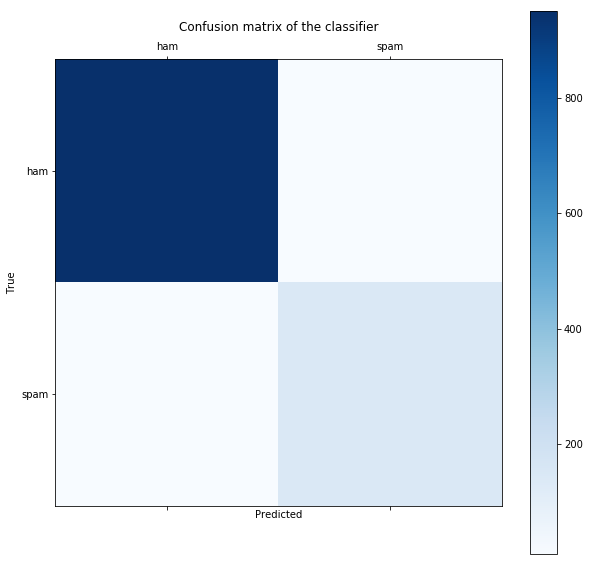

In [23]:
plot_cm_output(cm)